<a href="https://colab.research.google.com/github/Ramyanee/cats-dogs/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-08-29 12:19:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   194MB/s    in 0.3s    

2021-08-29 12:19:21 (194 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import tensorflow as tf

In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.173.jpg', 'cat.562.jpg', 'cat.661.jpg', 'cat.343.jpg', 'cat.440.jpg', 'cat.6.jpg', 'cat.890.jpg', 'cat.8.jpg', 'cat.390.jpg', 'cat.764.jpg']
['dog.304.jpg', 'dog.556.jpg', 'dog.428.jpg', 'dog.429.jpg', 'dog.460.jpg', 'dog.765.jpg', 'dog.787.jpg', 'dog.718.jpg', 'dog.445.jpg', 'dog.500.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

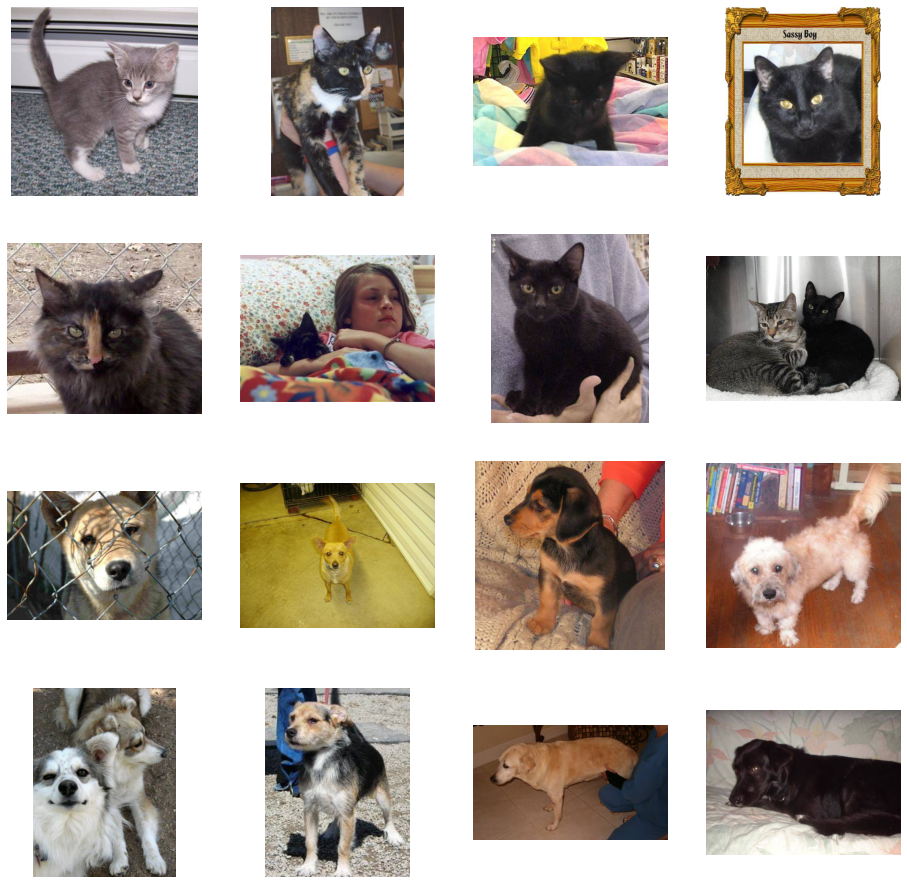

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
from tensorflow.keras.optimizers import RMSprop

In [12]:
def create_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

  

  return model

In [13]:
model = create_model()

In [14]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
history =  model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data = validation_generator,
    validation_steps=50,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 39s - loss: 0.7295 - acc: 0.5580 - val_loss: 0.6475 - val_acc: 0.5940
Epoch 2/15
100/100 - 10s - loss: 0.6362 - acc: 0.6630 - val_loss: 0.5792 - val_acc: 0.6930
Epoch 3/15
100/100 - 10s - loss: 0.5452 - acc: 0.7215 - val_loss: 0.5704 - val_acc: 0.7050
Epoch 4/15
100/100 - 10s - loss: 0.4856 - acc: 0.7655 - val_loss: 0.5851 - val_acc: 0.6850
Epoch 5/15
100/100 - 10s - loss: 0.4158 - acc: 0.8090 - val_loss: 0.6124 - val_acc: 0.6870
Epoch 6/15
100/100 - 10s - loss: 0.3370 - acc: 0.8540 - val_loss: 0.6665 - val_acc: 0.7190
Epoch 7/15
100/100 - 10s - loss: 0.2588 - acc: 0.8930 - val_loss: 0.7238 - val_acc: 0.7050
Epoch 8/15
100/100 - 9s - loss: 0.1831 - acc: 0.9270 - val_loss: 0.8386 - val_acc: 0.7270
Epoch 9/15
100/100 - 10s - loss: 0.1260 - acc: 0.9525 - val_loss: 0.9377 - val_acc: 0.7390
Epoch 10/15
100/100 - 10s - loss: 0.0956 - acc: 0.9655 - val_loss: 1.0658 - val_acc: 0.7260
Epoch 11/15
100/100 - 10s - loss: 0.0571 - acc: 0.9790 - val_loss: 1.3642 - val_acc: 0.683

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images= np.vstack([x])
  classes= model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')

Saving _111434467_gettyimages-1143489763-2.jpg to _111434467_gettyimages-1143489763-2.jpg
[0.]
_111434467_gettyimages-1143489763-2.jpg is a cat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


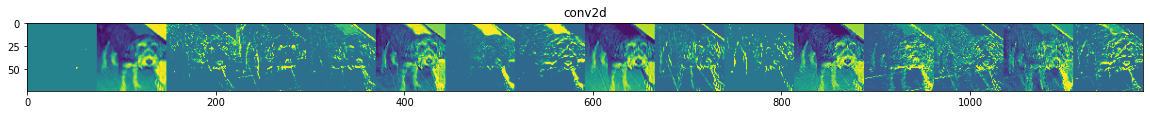

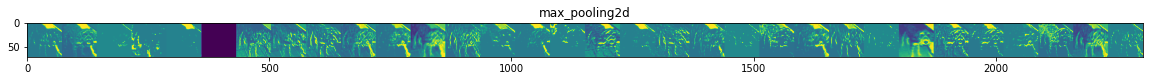

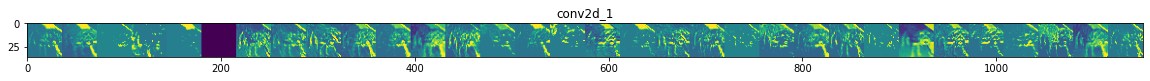

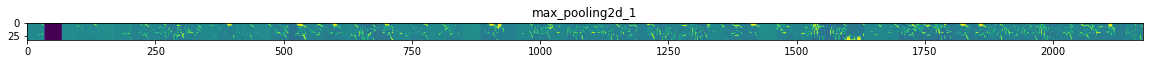

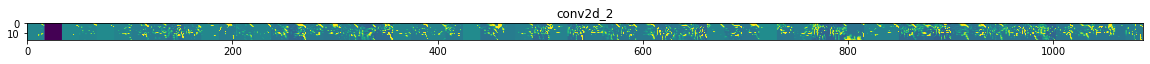

In [18]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 